<a href="https://colab.research.google.com/github/williamfazle/Machine-Learning/blob/main/Decision_Tree_Regression_for_diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# -------------------------------------------------------
# 1. Import Required Libraries
# -------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# -------------------------------------------------------
# 2. Load Dataset
# -------------------------------------------------------
df = pd.read_csv('/content/diabetes_dataset.csv')

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [19]:
# -------------------------------------------------------
# 3. Split Features and Target
# -------------------------------------------------------
X = df.drop('target', axis=1)   # features
y = df['target']                # target variable


In [20]:
# -------------------------------------------------------
# 4. Train-Test Split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
# -------------------------------------------------------
# 5. Preprocessing – Scaling Features
# -------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# -------------------------------------------------------
# 6. Decision Tree Regression Model
# -------------------------------------------------------
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [23]:
# -------------------------------------------------------
# 7. Make Predictions
# -------------------------------------------------------
y_pred = model.predict(X_test_scaled)


In [24]:
# -------------------------------------------------------
# 8. Evaluation Metrics
# -------------------------------------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Model Performance:
Mean Squared Error (MSE): 3526.0155119980145
R² Score: 0.3344819704370976


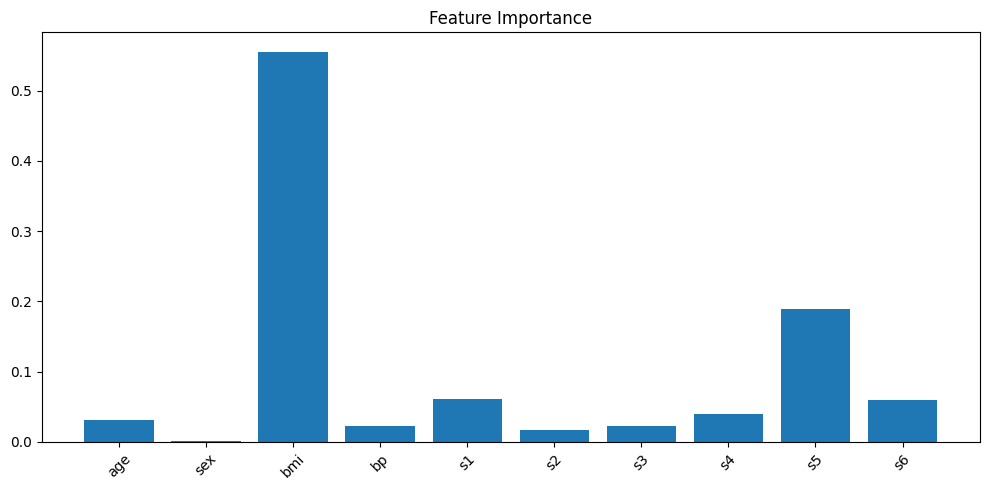

In [25]:
# -------------------------------------------------------
# 9. Feature Importance Plot
# -------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.bar(X.columns, model.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

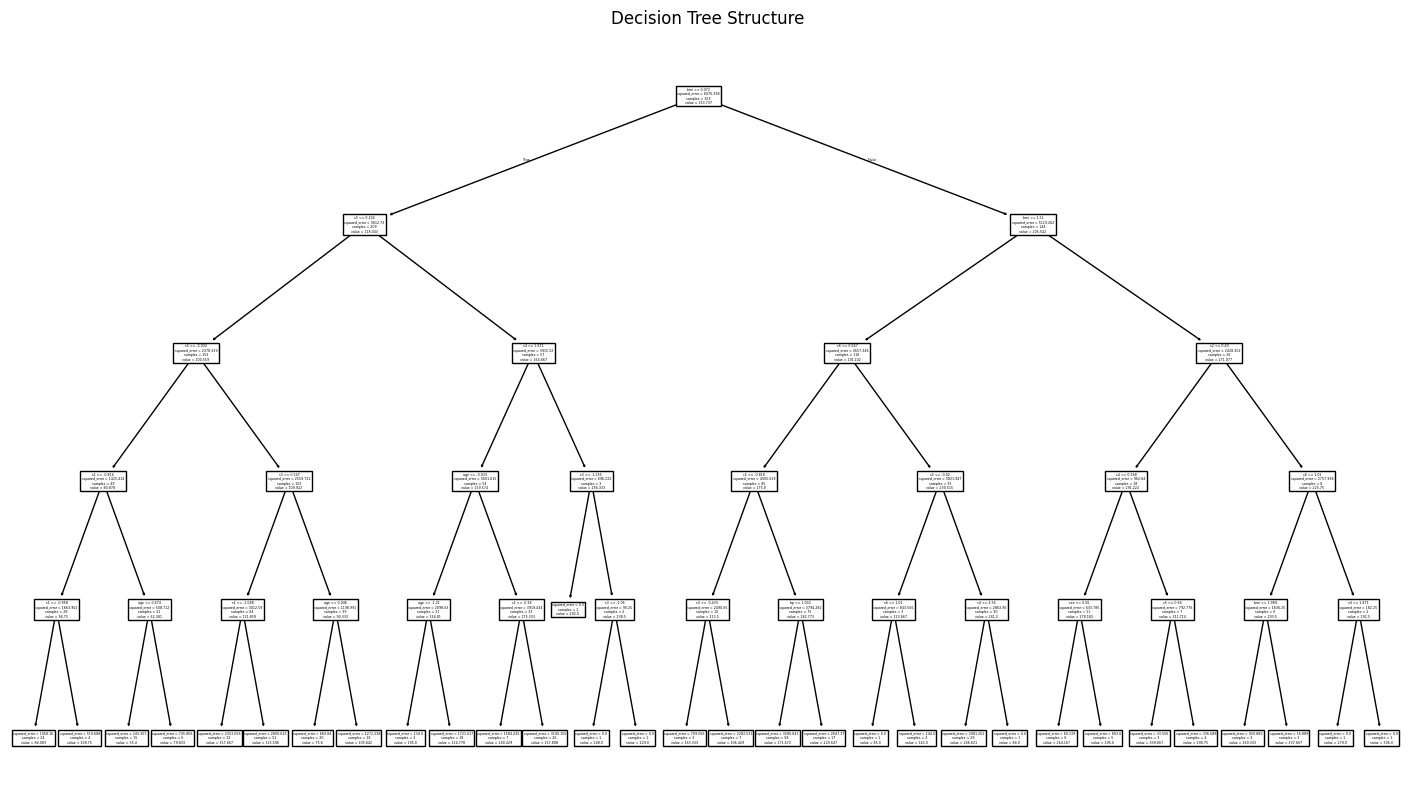

In [26]:
# -------------------------------------------------------
# 10. Decision Tree Diagram
# -------------------------------------------------------
plt.figure(figsize=(18, 10))
plot_tree(model, feature_names=X.columns, filled=False)
plt.title("Decision Tree Structure")
plt.show()

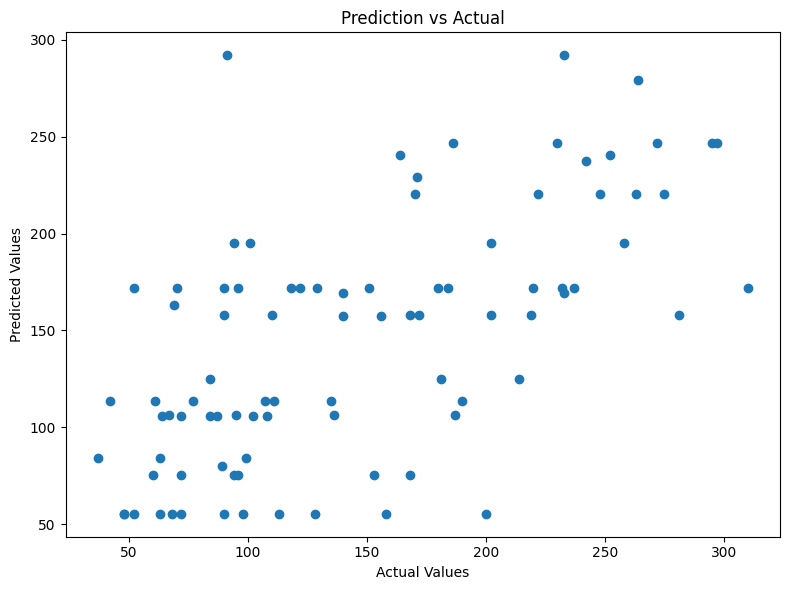

In [27]:
# -------------------------------------------------------
# 11. Prediction vs Actual Plot
# -------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual")
plt.tight_layout()
plt.show()